# Exploratory Data Analysis on 'Road Accidents' using Python - Part I

## Data Cleaning and Preparation

This notebook covers importing of dataset from Kaggle, understanding of the data and the process of cleaning and preparing the information for Analysis in the next part.

### Importing Python Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
plt.style.use('bmh')

### Installing Library to import dataset

In [4]:
pip install opendatasets --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
import opendatasets as od

In [4]:
url = 'https://www.kaggle.com/datasets/s3programmer/road-accident-severity-in-india/data'

In [5]:
od.download(url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nikism241
Your Kaggle Key: ········


100%|████████████████████████████████████████████████████████████████████████████████| 310k/310k [00:00<00:00, 395kB/s]

### Reading the Data

In [6]:
file = './road-accident-severity-in-india/Road.csv'
df = pd.read_csv(file)

In [10]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

### Data Preparation and Cleaning

In [11]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [14]:
df.shape

(12316, 32)

#### Removing of unwanted columns

In [17]:
df.drop(['Fitness_of_casuality','Work_of_casuality','Types_of_Junction','Road_allignment','Lanes_or_Medians',
         'Pedestrian_movement'],axis=1,inplace=True) 

In [19]:
df.shape

(12316, 26)

In [21]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Cause_of_accident                 0
Accident_severity                 0
dtype: int64

#### Taking care of null values

In [23]:
# Defect of vehicle
df.Defect_of_vehicle.value_counts(dropna=False)

No defect    7777
NaN          4427
7              76
5              36
Name: Defect_of_vehicle, dtype: int64

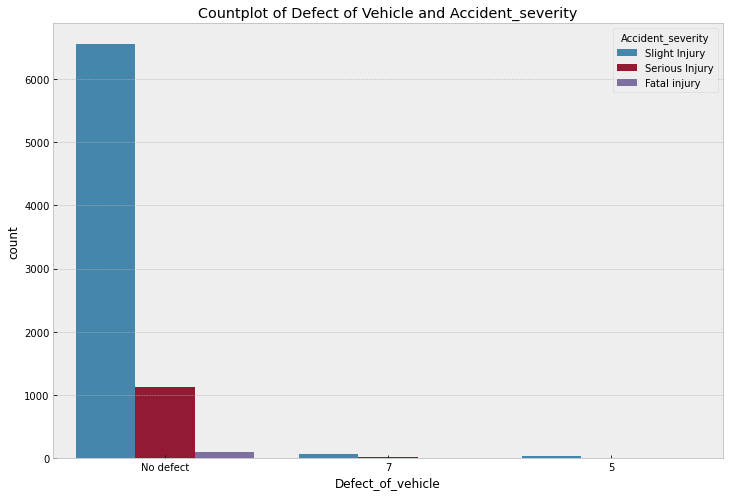

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(x='Defect_of_vehicle',hue='Accident_severity',data=df)
plt.title('Countplot of Defect of Vehicle and Accident_severity')
plt.show()

In [28]:
#
df.drop('Defect_of_vehicle',axis=1,inplace=True) 

In [29]:
# Service_year_of_vehicle
df.Service_year_of_vehicle.value_counts(dropna=False)

NaN           3928
Unknown       2883
2-5yrs        1792
Above 10yr    1324
5-10yrs       1280
1-2yr          827
Below 1yr      282
Name: Service_year_of_vehicle, dtype: int64

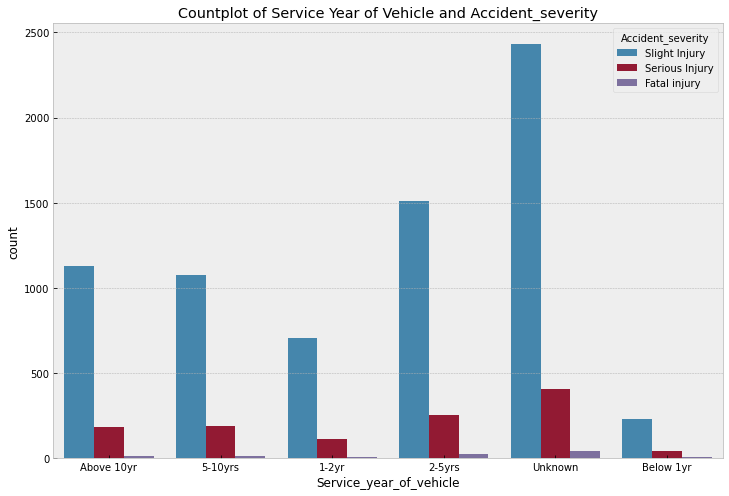

In [32]:
plt.figure(figsize=(12,8))
sns.countplot(x='Service_year_of_vehicle',hue='Accident_severity',data=df)
plt.title('Countplot of Service Year of Vehicle and Accident_severity')
plt.show()

In [38]:
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].fillna('Unknown')

In [39]:
df.isnull().sum()

Time                             0
Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level              741
Vehicle_driver_relation        579
Driving_experience             829
Type_of_vehicle                950
Owner_of_vehicle               482
Service_year_of_vehicle          0
Area_accident_occured          239
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Sex_of_casualty                  0
Age_band_of_casualty             0
Casualty_severity                0
Cause_of_accident                0
Accident_severity                0
dtype: int64

In [42]:
df.Educational_level.value_counts(dropna=False)

Junior high school    7619
Elementary school     2163
High school           1110
NaN                    741
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: Educational_level, dtype: int64

In [43]:
df['Educational_level']=df['Educational_level'].fillna('Unknown')

In [45]:
df.Driving_experience.value_counts(dropna=False)

5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
NaN            829
No Licence     118
unknown         33
Name: Driving_experience, dtype: int64

In [47]:
df['Driving_experience']=df['Driving_experience'].fillna('unknown')

In [50]:
df.drop('Vehicle_driver_relation',axis=1,inplace=True) 

In [51]:
df.isnull().sum()

Time                             0
Day_of_week                      0
Age_band_of_driver               0
Sex_of_driver                    0
Educational_level                0
Driving_experience               0
Type_of_vehicle                950
Owner_of_vehicle               482
Service_year_of_vehicle          0
Area_accident_occured          239
Road_surface_type              172
Road_surface_conditions          0
Light_conditions                 0
Weather_conditions               0
Type_of_collision              155
Number_of_vehicles_involved      0
Number_of_casualties             0
Vehicle_movement               308
Casualty_class                   0
Sex_of_casualty                  0
Age_band_of_casualty             0
Casualty_severity                0
Cause_of_accident                0
Accident_severity                0
dtype: int64

In [53]:
df.dropna(inplace=True)

In [54]:
df.shape

(10262, 24)

In [56]:
df.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Area_accident_occured          0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [62]:
df.duplicated().sum()

0

In [83]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Area_accident_occured          object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_severity              object
Cause_of_accident              object
Accident_severity              object
dtype: object

In [81]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Area_accident_occured,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,1-2yr,Automobile,Owner,Above 10yr,Residential areas,...,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Above 10yr,Public (> 45 seats),Owner,5-10yrs,Office areas,...,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,1-2yr,Lorry (41?100Q),Owner,Unknown,Recreational areas,...,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,5-10yr,Public (> 45 seats),Governmental,Unknown,Office areas,...,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Changing lane to the right,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,2-5yr,Automobile,Governmental,Above 10yr,Residential areas,...,Vehicle with vehicle collision,2,1,U-Turn,na,na,na,na,No priority to vehicle,Slight Injury


#### Saving the Clean data for future use

In [82]:
df.to_csv('Accident_Data_CLEANED.csv')